In [12]:
import os
import folium
import geojson
import zipfile 
import numpy as np
import pandas as pd 
import geopandas as gpd
from osgeo import gdal, ogr
import matplotlib.pyplot as plt
from IPython.display import display
from sentinelsat import SentinelAPI,geojson_to_wkt,read_geojson

In [13]:
kml_in = r'E:\sentinel2\KWT_poly.kml'
geoJ_out = r'E:\sentinel2\KWT_poly.geosjon'

In [14]:
try:
    os.remove(geoJ_out)
except OSError:
    pass

In [15]:
srcDS = gdal.OpenEx(kml_in)
ds = gdal.VectorTranslate(geoJ_out, srcDS, format='GeoJSON')

In [16]:
## Read GeoJSON and get center coords
gdf = gpd.read_file(geoJ_out)
gdf.head()
gdf = gdf.to_crs(epsg=4326)  # EPSG 4326 = WGS84 = https://epsg.io/4326
lon = gdf.iloc[0].geometry.centroid.y
lat = gdf.iloc[0].geometry.centroid.x

In [18]:
## display in map
m = folium.Map([lon,lat], zoom_start = 10)
folium.GeoJson(geoJ_out).add_to(m)
m

In [45]:
## scihub credentials
user = 'sneti' ## change this!
password = '2441KFKsneha!*u' ## change this!

In [46]:
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')
footprint = geojson_to_wkt(read_geojson(geoJ_out))
print(footprint)

POLYGON((48.2913 28.5156,48.5565 28.5407,48.4408 28.8577,48.2090 28.7952,48.2913 28.5156))


In [59]:
## search
#startdate = '20190801'
#enddate = '20190923'
products = api.query(footprint,
                        date = ('20190901', '20190915'),
                        platformname = 'Sentinel-2',
                        processinglevel = 'Level-2A',
                        cloudcoverpercentage = (0, 20))

In [60]:
print(len(products))

10


In [61]:
api.to_geodataframe(products)

,title,link,link_alternative,link_icon,summary,beginposition,endposition,ingestiondate,orbitnumber,relativeorbitnumber,...,processingbaseline,processinglevel,producttype,platformname,size,filename,level1cpdiidentifier,identifier,uuid,geometry
084b2ae9-b553-4fc6-b3a7-a43d3b31aa86,S2A_MSIL2A_20190910T071621_N0213_R006_T39RTM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-09-10T07:16:21.024Z, Instrument: MS...",2019-09-10 07:16:21.024,2019-09-10 07:16:21.024,2019-09-10 18:11:59.444,22025,6,...,02.13,Level-2A,S2MSI2A,Sentinel-2,508.01 MB,S2A_MSIL2A_20190910T071621_N0213_R006_T39RTM_2...,S2A_OPER_MSI_L1C_TL_MTI__20190910T093010_A0220...,S2A_MSIL2A_20190910T071621_N0213_R006_T39RTM_2...,084b2ae9-b553-4fc6-b3a7-a43d3b31aa86,(POLYGON ((49.06025869560823 28.28828327869941...
2d81947d-8710-4809-912f-098e469fb90a,S2A_MSIL2A_20190903T072621_N0213_R049_T39RTM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-09-03T07:26:21.024Z, Instrument: MS...",2019-09-03 07:26:21.024,2019-09-03 07:26:21.024,2019-09-03 18:11:19.046,21925,49,...,02.13,Level-2A,S2MSI2A,Sentinel-2,271.44 MB,S2A_MSIL2A_20190903T072621_N0213_R049_T39RTM_2...,S2A_OPER_MSI_L1C_TL_MTI__20190903T094035_A0219...,S2A_MSIL2A_20190903T072621_N0213_R049_T39RTM_2...,2d81947d-8710-4809-912f-098e469fb90a,(POLYGON ((47.95214137520379 27.90341568721899...
301215b8-5b45-43a3-8fa5-9538b505b36d,S2B_MSIL2A_20190905T071619_N0213_R006_T39RTM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-09-05T07:16:19.024Z, Instrument: MS...",2019-09-05 07:16:19.024,2019-09-05 07:16:19.024,2019-09-05 17:27:28.963,13045,6,...,02.13,Level-2A,S2MSI2A,Sentinel-2,876.78 MB,S2B_MSIL2A_20190905T071619_N0213_R006_T39RTM_2...,S2B_OPER_MSI_L1C_TL_EPAE_20190905T101351_A0130...,S2B_MSIL2A_20190905T071619_N0213_R006_T39RTM_2...,301215b8-5b45-43a3-8fa5-9538b505b36d,(POLYGON ((47.95214137520379 27.90341568721899...
63c46b47-ec46-458f-8ece-e80f7c1c3fec,S2A_MSIL2A_20190913T072611_N0213_R049_T39RTN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-09-13T07:26:11.024Z, Instrument: MS...",2019-09-13 07:26:11.024,2019-09-13 07:26:11.024,2019-09-13 13:56:34.098,22068,49,...,02.13,Level-2A,S2MSI2A,Sentinel-2,496.18 MB,S2A_MSIL2A_20190913T072611_N0213_R049_T39RTN_2...,S2A_OPER_MSI_L1C_TL_SGS__20190913T092831_A0220...,S2A_MSIL2A_20190913T072611_N0213_R049_T39RTN_2...,63c46b47-ec46-458f-8ece-e80f7c1c3fec,(POLYGON ((47.92627494182379 28.80444524547399...
9c06406d-9c5b-42fb-99b0-6ff3c6595823,S2A_MSIL2A_20190910T071621_N0213_R006_T39RTM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-09-10T07:16:21.024Z, Instrument: MS...",2019-09-10 07:16:21.024,2019-09-10 07:16:21.024,2019-09-10 17:26:30.614,22025,6,...,02.13,Level-2A,S2MSI2A,Sentinel-2,648.77 MB,S2A_MSIL2A_20190910T071621_N0213_R006_T39RTM_2...,S2A_OPER_MSI_L1C_TL_EPAE_20190910T105206_A0220...,S2A_MSIL2A_20190910T071621_N0213_R006_T39RTM_2...,9c06406d-9c5b-42fb-99b0-6ff3c6595823,(POLYGON ((47.95214137520379 27.90341568721899...
a37858cb-14bd-4440-a3bf-687d0b3b8fb0,S2A_MSIL2A_20190913T072611_N0213_R049_T39RTM_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-09-13T07:26:11.024Z, Instrument: MS...",2019-09-13 07:26:11.024,2019-09-13 07:26:11.024,2019-09-13 13:56:23.950,22068,49,...,02.13,Level-2A,S2MSI2A,Sentinel-2,285.36 MB,S2A_MSIL2A_20190913T072611_N0213_R049_T39RTM_2...,S2A_OPER_MSI_L1C_

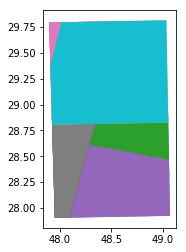

In [62]:
areas = api.to_geodataframe(products)
areas.plot(column='uuid', cmap=None)

TypeError: ("annotate() missing 1 required positional argument: 'text'", 'occurred at index 084b2ae9-b553-4fc6-b3a7-a43d3b31aa86')

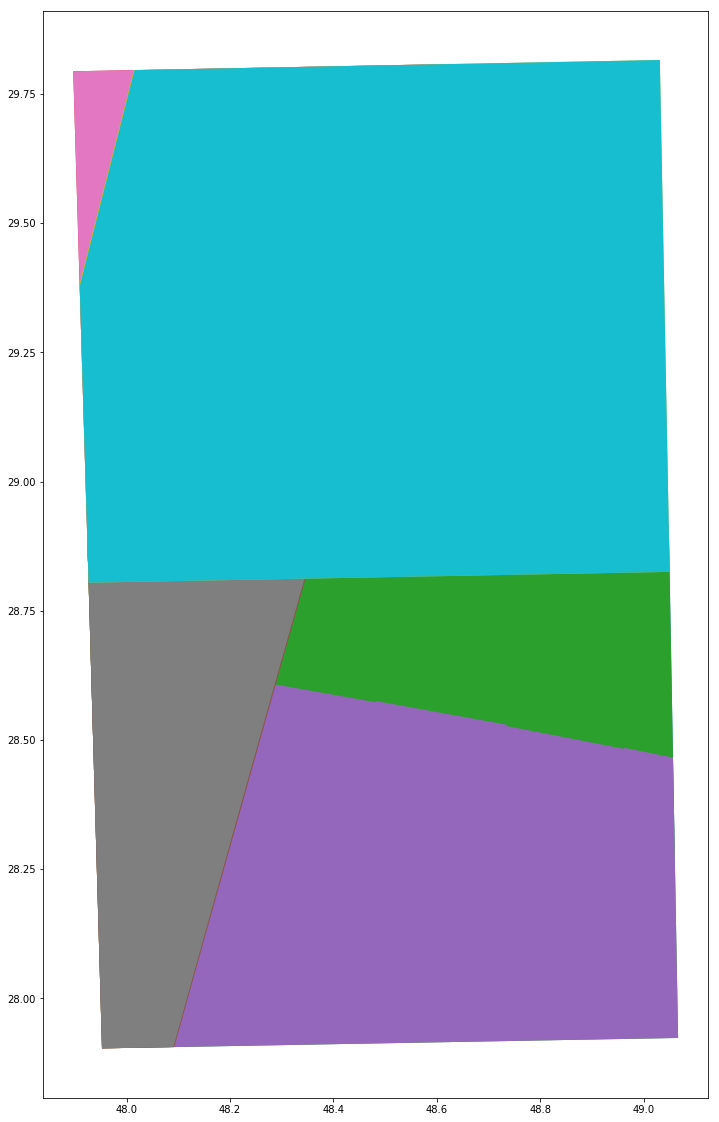

In [66]:
## label the polygons
ax = areas.plot(column='uuid', cmap=None, figsize=(50, 20))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)

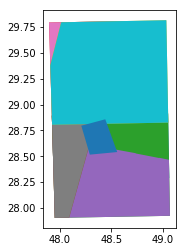

In [64]:
## Inspect vs our bounds
gdf2 = gpd.read_file(geoJ_out)
f, ax = plt.subplots(1)
areas.plot(ax=ax,column='uuid',cmap=None,)
gdf2.plot(ax=ax)
plt.show()

In [67]:
## Get uuid
api.get_product_odata('f10a2c73-b4ff-431d-aec2-28313c42d4e6')

{'id': 'f10a2c73-b4ff-431d-aec2-28313c42d4e6',
 'title': 'S2B_MSIL2A_20190905T071619_N0213_R006_T39RTN_20190905T111326',
 'size': 869416271,
 'md5': '5F7653F01E8AB8BB86E183D1EADE7A63',
 'date': datetime.datetime(2019, 9, 5, 7, 16, 19, 24000),
 'footprint': 'POLYGON((47.90901900554822 29.377234504419867,47.923253609638834 29.433480061423367,47.960741960866656 29.581427522986885,47.99825910881376 29.729311083842784,48.0152310237752 29.79628750107283,49.03156177728837 29.81580116202728,49.05049184895457 28.825378767193317,47.92627494182379 28.804445245473985,47.90901900554822 29.377234504419867))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('f10a2c73-b4ff-431d-aec2-28313c42d4e6')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2019, 9, 5, 17, 33, 21, 784000),
 'Ingestion Date': datetime.datetime(2019, 9, 5, 17, 32, 31, 601000)}

In [69]:
## download the data
api.download('f10a2c73-b4ff-431d-aec2-28313c42d4e6')

Downloading: 100%|███████████████████████████████████████████████████████████████████████████| 869M/869M [02:12<00:00, 6.59MB/s]
MD5 checksumming: 100%|███████████████████████████████████████████████████████████████████████| 869M/869M [00:04<00:00, 186MB/s]


{'id': 'f10a2c73-b4ff-431d-aec2-28313c42d4e6',
 'title': 'S2B_MSIL2A_20190905T071619_N0213_R006_T39RTN_20190905T111326',
 'size': 869416271,
 'md5': '5F7653F01E8AB8BB86E183D1EADE7A63',
 'date': datetime.datetime(2019, 9, 5, 7, 16, 19, 24000),
 'footprint': 'POLYGON((47.90901900554822 29.377234504419867,47.923253609638834 29.433480061423367,47.960741960866656 29.581427522986885,47.99825910881376 29.729311083842784,48.0152310237752 29.79628750107283,49.03156177728837 29.81580116202728,49.05049184895457 28.825378767193317,47.92627494182379 28.804445245473985,47.90901900554822 29.377234504419867))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('f10a2c73-b4ff-431d-aec2-28313c42d4e6')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2019, 9, 5, 17, 33, 21, 784000),
 'Ingestion Date': datetime.datetime(2019, 9, 5, 17, 32, 31, 601000),
 'path': '.\\S2B_MSIL2A_20190905T071619_N0213_R006_T39RTN_20190905T111326.zip',
 'downloaded_bytes': 869416271}

In [73]:
## Get the path name so we can unzip
path_tozip = 'E:\sentinel2'

In [78]:
## unzip 
PATH = r'E:\sentinel2'
directory_to_extract_to =r'E:\sentinel2'
for root, dirs, files in os.walk(PATH):
    for file in files:
        if file.endswith('.zip'):
            ### Fetch all .h5 files
            file_to_extracted = os.path.join(root, file)
            print(file_to_extracted)
            with zipfile.ZipFile(file_to_extracted, 'r') as zip_ref:
                zip_ref.extractall(directory_to_extract_to)
            #
            zip_ref.close()

E:\sentinel2\S2B_MSIL2A_20190905T071619_N0213_R006_T39RTN_20190905T111326.zip


In [ ]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
#import bands as separate 1 band raster
## granule-->L2-->Img_data-->  OR granule-->L2-->Img_data-->R10m-->
imagePath = r''
imagePath = r''
outfolder = r''
band2 = rasterio.open(imagePath+'T39RTM_20190915T071619_B02_10m.jp2', driver='JP2OpenJPEG') #blue
band3 = rasterio.open(imagePath+'T39RTM_20190915T071619_B03_10m.jp2', driver='JP2OpenJPEG') #green
band4 = rasterio.open(imagePath+'T39RTM_20190915T071619_B03_10m.jp2', driver='JP2OpenJPEG') #red
band8 = rasterio.open(imagePath+'T39RTM_20190915T071619_B08_10m.jp2', driver='JP2OpenJPEG') #nir

In [13]:
#number of raster bands
band4.count
#number of raster columns
band4.width
#number of raster rows
band4.height
#plot band 
plot.show(band4)
#type of raster byte
band4.dtypes[0]
#raster sytem of reference
band4.crs
#raster transform parameters
band4.transform
#raster values as matrix array
band4.read(1)

In [13]:
#multiple band representation
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
plot.show(band2, ax=ax1, cmap='Blues')
plot.show(band3, ax=ax2, cmap='Greens')
plot.show(band4, ax=ax3, cmap='Reds')
fig.tight_layout()

In [79]:
#export true color image
trueColor = rasterio.open(outfolder+'/SentinelTrueColor2.tiff','w',driver='Gtiff',
                            width=band4.width, height=band4.height,
                            count=3,
                            crs=band4.crs,
                            transform=band4.transform,
                            dtype=band4.dtypes[0]
                            )
trueColor.write(band2.read(1),3) #blue
trueColor.write(band3.read(1),2) #green
trueColor.write(band4.read(1),1) #red
trueColor.close()

NameError: name 'rasterio' is not defined

In [ ]:
src = rasterio.open(outfolder+'/SentinelTrueColor2.tiff", count=3)
plot.show(src)

In [13]:
#export false color image
falseColor = rasterio.open(outfolder+'/SentinelFalseColor.tiff', 'w', driver='Gtiff',
                            width=band2.width, height=band2.height,
                            count=3,
                            crs=band2.crs,
                            transform=band2.transform,
                            dtype='uint16'                   
                            )
falseColor.write(band3.read(1),3) #Blue
falseColor.write(band4.read(1),2) #Green
falseColor.write(band8.read(1),1) #Red
falseColor.close()

In [13]:
#generate histogram
trueColor = rasterio.open(outfolder+'/SentinelTrueColor2.tiff')
plot.show_hist(trueColor, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")